# K-means, 샘플데이터

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비
- 샘플만들어서 사용

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  centers=3,
                  cluster_std=0.5,
                  n_features=2,random_state=0)

In [12]:
X.shape

(150, 2)

In [13]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

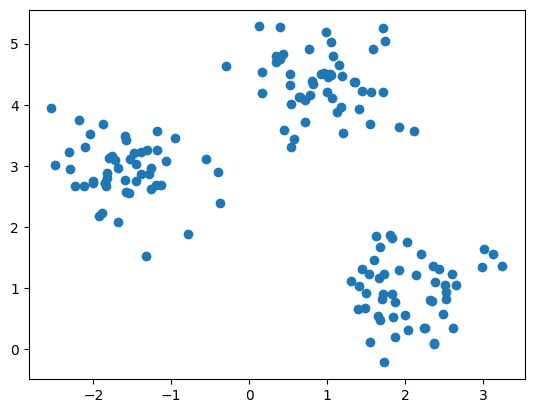

In [18]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 학습

In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,random_state=2022)
km.fit(X)

C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2022)

In [23]:
y_pred = km.predict(X)

In [27]:
df = pd.DataFrame(X,columns=['X_1','X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [28]:
df['y_pred'] = y_pred
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


In [32]:
centroid = km.cluster_centers_
centroid

array([[ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712],
       [-1.5947298 ,  2.92236966]])

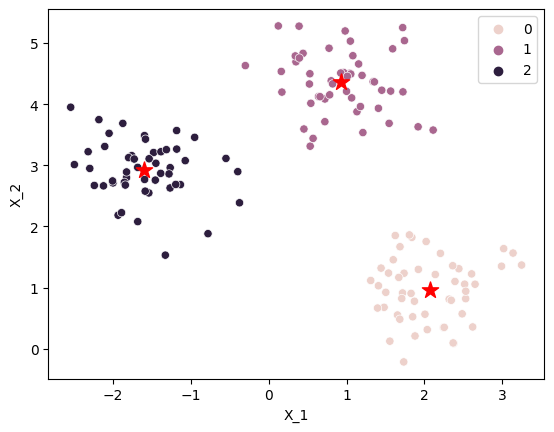

In [34]:
sns.scatterplot(data=df,x='X_1',y='X_2',hue=y_pred)
plt.scatter(centroid[:,0],centroid[:,1],
           s=150,marker='*',c='red')

### elbow method

In [40]:
inertia = []
for k in range(2,11) :
    km = KMeans(n_clusters=k,random_state=2022)
    km.fit(X)
    inertia.append(km.inertia_)

C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

In [41]:
inertia

[283.46101780209307,
 72.47601670996698,
 62.84061768542222,
 54.29757489773776,
 47.85292137212694,
 39.88978825654857,
 35.70304272594484,
 30.624470574346063,
 26.97109816223398]

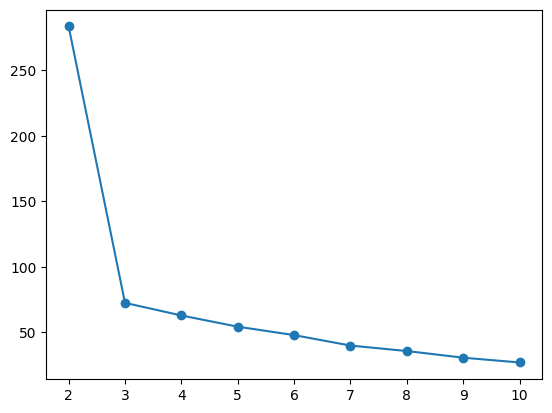

In [44]:
plt.plot(range(2,11),inertia,marker='o')

# iris 데이터를 사용해서 kmeans
---

In [74]:
from sklearn import datasets

iris = datasets.load_iris()

In [75]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [76]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
df = df.iloc[:,:2]

In [78]:
inertia = []
for k in range(2,11) :
    km = KMeans(n_clusters=k,random_state=2022)
    km.fit(df)
    inertia.append(km.inertia_)

C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

In [79]:
inertia

[58.20409278906673,
 37.05070212765958,
 28.034982153246226,
 21.00212598224944,
 17.70301535087719,
 14.87059523809524,
 12.728480602730604,
 11.14661940836941,
 9.770409279231263]

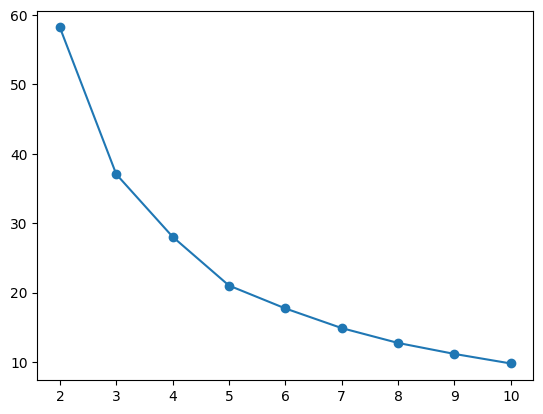

In [80]:
plt.plot(range(2,11),inertia,marker='o')

In [81]:
# df = df.values
km = KMeans(n_clusters=3,random_state=2022)
km.fit(df)

C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2022)

In [82]:
y_pred = km.predict(df)

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

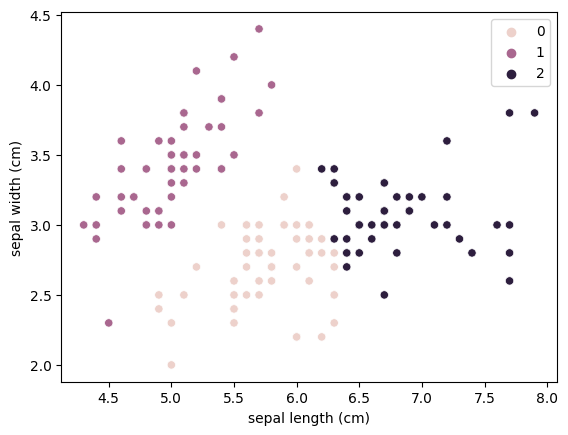

In [86]:
df.columns
sns.scatterplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue=y_pred)